# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head(2)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6


In [4]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


### There is a strong correlation b/w Chirps/Second & Ground Temperature

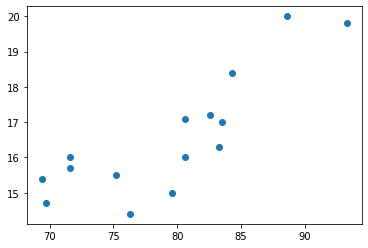

In [5]:
plt.scatter(df['Ground Temperature'],df["Chirps/Second"])

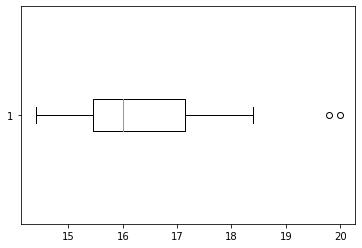

In [6]:
plt.boxplot(df["Chirps/Second"],vert=False)
plt.show()

In [7]:
# Clipping Chirps/Second outlier values
# iqr = df["Chirps/Second"].quantile(0.75) - df["Chirps/Second"].quantile(0.25)
# upper_threshold = df["Chirps/Second"].quantile(0.75) + (1.5 * iqr)
# lower_threshold = df["Chirps/Second"].quantile(0.25) - (1.5 * iqr)
# df["Chirps/Second"] = df["Chirps/Second"].clip(lower_threshold,upper_threshold)

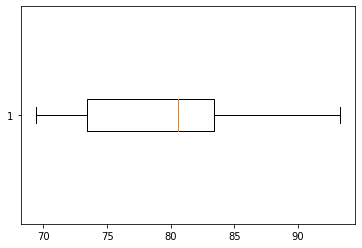

In [8]:
plt.boxplot(df["Ground Temperature"],vert=False)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
df.shape

(15, 2)

In [11]:
X = df["Ground Temperature"].values
y = df["Chirps/Second"].values
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
"X_train.shape",X_train.shape,"X_test.shape",X_test.shape,"y_train.shape",y_train.shape,"y_test.shape",y_test.shape

('X_train.shape',
 (12, 1),
 'X_test.shape',
 (3, 1),
 'y_train.shape',
 (12,),
 'y_test.shape',
 (3,))

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Slope(m): ",regressor.coef_)
print("Intercept(c): ",regressor.intercept_)

Slope(m):  [0.23699083]
Intercept(c):  -2.3718369045768526


In [15]:
y_pred = regressor.predict(X_test)
print("y_predicted: ",y_pred)

y_predicted:  [14.5967064  14.07532658 17.41689726]


In [16]:
df_op = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_op

,Actual,Predicted
0,15.7,14.596706
1,15.4,14.075327
2,17.0,17.416897


In [17]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -1.174529794232082


## 1. Linear regression equation :   y = 0.20119124 * X + 0.6005148917491159

## 2. Chart the original data and the equation on the chart.

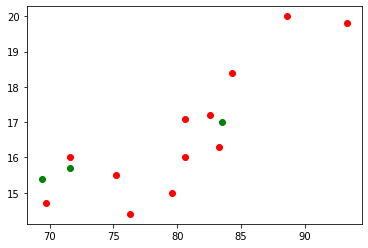

In [18]:
plt.scatter(X_test, y_test, color='Green')
plt.scatter(X_train, y_train, color='Red')

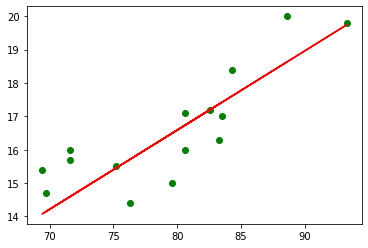

In [19]:
plt.scatter(X, y, color='Green')
plt.plot(X, regressor.predict(X), color='Red')
plt.show()

## 3. Find the equation's  𝑅2  score (use the .score method)

In [20]:
print('R2- SCORE:',regressor.score(X_test,y_test))

R2- SCORE: -1.174529794232082


## 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [21]:
print("Temperature = 95")
print(f"Expected Chirping = {regressor.predict(np.array(95).reshape(-1,1))}")

Temperature = 95
Expected Chirping = [20.14229178]


## 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [22]:
print("Chirping = 18 chirps per second")
print(f"Approximate ground temperature = {(18-0.6005148917491159)/0.20119124}")

Chirping = 18 chirps per second
Approximate ground temperature = 86.48231954955338
